<a href="https://colab.research.google.com/github/deriiinjv/pytorch-playground/blob/main/linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt


In [ ]:
x=torch.linspace(0,1,100).unsqueeze(1)
y=2*x+1

In [ ]:
w=torch.randn(1,requires_grad=True,dtype=torch.float32)
b=torch.randn(1,requires_grad=True,dtype=torch.float32)

In [ ]:
def mse(y_pred,y_true):
  return torch.mean((y_pred-y_true)**2)

In [ ]:
learning_rate=0.1
epochs=100
for epoch in range(epochs):
  y_pred=w*x+b
  loss=mse(y_pred,y)
  loss.backward()

  with torch.no_grad():
    w-=learning_rate*w.grad
    b-=learning_rate*b.grad

  w.grad.zero_()
  b.grad.zero_()

  if epoch%10==0:
    print(f"Epoch{epoch}:w={w.item():.4f},b={b.item():.4f},loss={loss.item():.6f}")

Epoch0:w=0.5112,b=1.1513,loss=1.828933
Epoch10:w=0.9200,b=1.5441,loss=0.102802
Epoch20:w=1.0683,b=1.4975,loss=0.076856
Epoch30:w=1.1866,b=1.4358,loss=0.058665
Epoch40:w=1.2893,b=1.3809,loss=0.044783
Epoch50:w=1.3791,b=1.3328,loss=0.034186
Epoch60:w=1.4575,b=1.2907,loss=0.026097
Epoch70:w=1.5260,b=1.2540,loss=0.019921
Epoch80:w=1.5859,b=1.2219,loss=0.015207
Epoch90:w=1.6382,b=1.1939,loss=0.011609


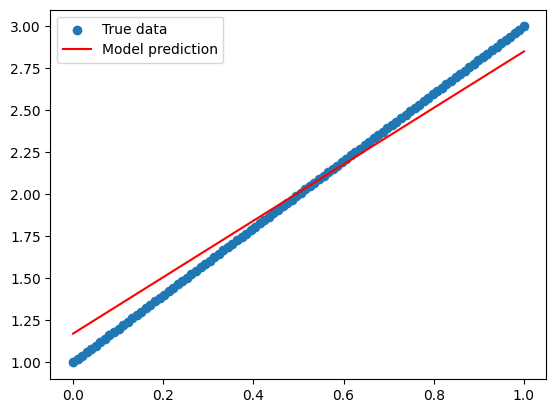

In [ ]:
# After training
predicted = w * x + b

plt.scatter(x.detach(), y, label="True data")
plt.plot(x.detach(), predicted.detach(), color="red", label="Model prediction")
plt.legend()
plt.show()
